In [ ]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

# Install necessary libraries
!pip install xgboost
!pip install imbalanced-learn
!pip install scikit-learn

# Importing required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset (assuming the CSV file is in your Google Drive)
file_path = '/content/drive/MyDrive/makeup_recommendations_dataset.csv'
df = pd.read_csv(file_path)

# Print dataset head for reference
print("Dataset Head:")
print(df.head())

Dataset Head:
  eye_color  gender hair_type     look_type multi_tonal occasion occupation  \
0     Green  Female      Wavy        Trendy          No    Party     Doctor   
1     Black  Female      Wavy        Trendy         Yes   Formal   Engineer   
2     Hazel  Female      Wavy        Trendy         Yes    Party    Student   
3     Black  Female      Wavy  Professional          No   Formal   Engineer   
4     Black  Female      Wavy  Professional         Yes   Casual   Engineer   

    eyebrow_shape face_shape  lip_shape skin_color makeup_recommendation  
0  Thick Eyebrows    Diamond       Wide        Tan             Edgy Look  
1  Thick Eyebrows    Diamond  Full Lips        Tan  Classic Professional  
2   Thin Eyebrows       Oval       Wide       Fair          Natural Look  
3          Arched       Oval  Thin Lips       Dark     Smokey Eye Makeup  
4            Flat     Square  Thin Lips       Fair  Classic Professional  


In [ ]:
# Handle missing values if any (optional)
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    print(f"Encoded column: {column} with classes: {le.classes_}")

# Save the label encoders for later use
joblib.dump(label_encoders, '/content/drive/MyDrive/makeup_recommendation_label_encoders.pkl')


Encoded column: eye_color with classes: ['Black' 'Blue' 'Brown' 'Green' 'Hazel']
Encoded column: gender with classes: ['Female']
Encoded column: hair_type with classes: ['Curly' 'Kinky' 'Straight' 'Wavy']
Encoded column: look_type with classes: ['Natural' 'Professional' 'Trendy']
Encoded column: multi_tonal with classes: ['No' 'Yes']
Encoded column: occasion with classes: ['Casual' 'Formal' 'Party' 'Sport']
Encoded column: occupation with classes: ['Artist' 'Doctor' 'Engineer' 'Student' 'Teacher']
Encoded column: eyebrow_shape with classes: ['Arched' 'Flat' 'Thick Eyebrows' 'Thin Eyebrows']
Encoded column: face_shape with classes: ['Diamond' 'Heart' 'Oval' 'Round' 'Square']
Encoded column: lip_shape with classes: ['Full Lips' 'Round' 'Thin Lips' 'Wide']
Encoded column: skin_color with classes: ['Dark' 'Fair' 'Medium' 'Tan']
Encoded column: makeup_recommendation with classes: ['Bold Glam' 'Classic Professional' 'Edgy Look' 'Evening Elegance'
 'Minimalist Beauty' 'Natural Look' 'Party Gl

['/content/drive/MyDrive/makeup_recommendation_label_encoders.pkl']

In [ ]:
# Features (X) and target (y)
X = df.drop('makeup_recommendation', axis=1)
y = df['makeup_recommendation']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (469520, 11), Test set size: (117380, 11)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:15:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model accuracy: 100.00%


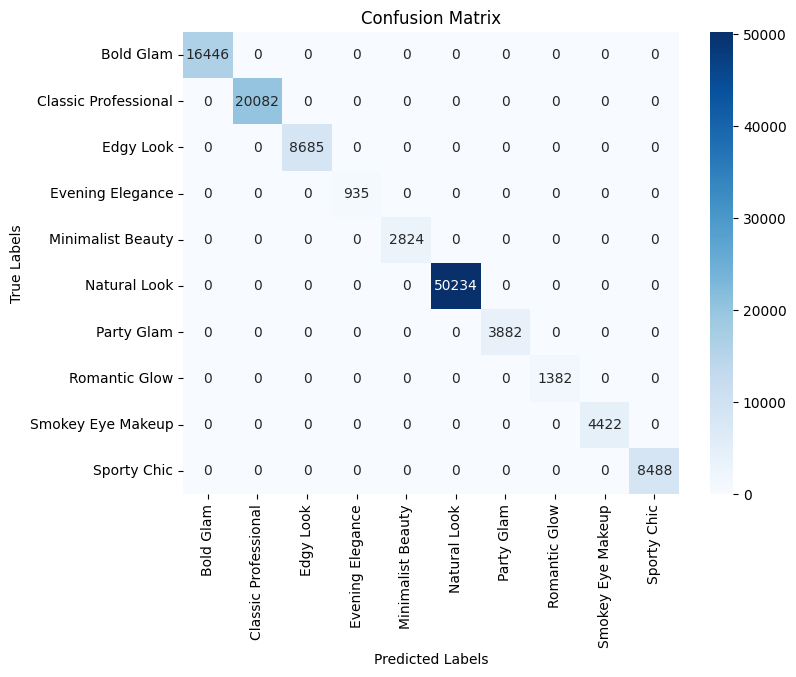

<Figure size 1000x800 with 0 Axes>

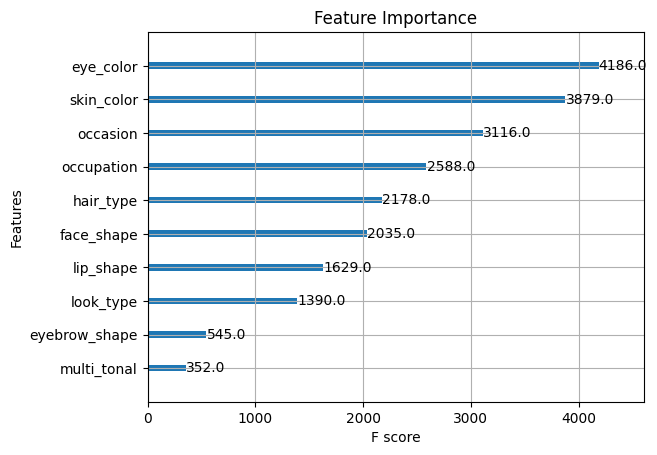

Trained XGBoost Model:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)


In [ ]:
# Initialize and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


joblib.dump(model, '/content/drive/MyDrive/makeup_recommendation_model.pkl')

# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['makeup_recommendation'].classes_, yticklabels=label_encoders['makeup_recommendation'].classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Feature importance plot
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance")
plt.show()

# Print trained model details
print("Trained XGBoost Model:")
print(model)


In [ ]:
import pandas as pd
import joblib

# Example user input data in string format
new_data_input = {
        'eye_color': 'Hazel',
        'gender': 'Female',
        'hair_type': 'Wavy',
        'look_type': 'Professional',
        'multi_tonal': 'No',
        'occasion': 'Party',
        'occupation': 'Student',
        'eyebrow_shape': 'Thick Eyebrows',
        'face_shape': 'Square',
        'lip_shape': 'Thin Lips',
        'skin_color': 'Dark'
}

# Load the saved label encoders (if not already loaded)
label_encoders = joblib.load('/content/drive/MyDrive/makeup_recommendation_label_encoders.pkl')

# Create a DataFrame for the new data input
new_data_df = pd.DataFrame([new_data_input])

# Encode the string values to numeric values using the saved label encoders
for column in new_data_df.columns:
    if column in label_encoders:
        le = label_encoders[column]
        new_data_df[column] = le.transform(new_data_df[column])
    else:
        print(f"Column '{column}' not found in saved encoders!")

# Show the encoded data
print("Encoded Data:")
print(new_data_df)

# Predict the makeup recommendation
prediction = model.predict(new_data_df)
print(f"Predicted Makeup Recommendation (Encoded Value): {prediction}")

# Classes and descriptions for makeup recommendations
makeup_classes = ['Bold Glam', 'Classic Professional', 'Edgy Look', 'Evening Elegance',
                  'Minimalist Beauty', 'Natural Look', 'Party Glam', 'Romantic Glow',
                  'Smokey Eye Makeup', 'Sporty Chic']

makeup_descriptions = {
    'Bold Glam': 'Strong, dramatic looks with bold eye makeup, bright lips, and contoured cheekbones. Best suited for individuals with darker eye colors like Brown and Black, along with skin tones like Tan and Dark.',
    'Classic Professional': 'A polished, clean makeup look featuring neutral tones, light eyeliner, and subtle blush. Fits well with those in formal occupations like Doctor and Engineer, especially with lighter skin colors and thin eyebrows.',
    'Edgy Look': 'Strong makeup with sharp lines, dark lipstick, and an unconventional feel. Perfect for those with creative occupations like Artist and face shapes like Square or Diamond.',
    'Evening Elegance': 'A sophisticated, polished look with defined eyes, neutral lips, and contoured features. Ideal for formal occasions and those with oval or round faces, and darker hair types like Curly and Wavy.',
    'Minimalist Beauty': 'Simple, fresh look with light makeup and a focus on natural beauty. Works well for individuals with Straight hair, Medium skin tone, and a "Natural" look type.',
    'Natural Look': 'Soft, neutral tones, suitable for everyday and professional settings. Ideal for those with light eye colors like Blue and Green, and light skin tones like Fair and Medium.',
    'Party Glam': 'Bright, vibrant makeup with shimmer and bold lip colors. Suited for individuals with bold eyebrow shapes like Thick Eyebrows and lip shapes like Full Lips, ideal for events like parties.',
    'Romantic Glow': 'Soft and glowing makeup with rosy blushes and natural lip colors. Works well for users with Full Lips and Oval or Heart-shaped faces.',
    'Smokey Eye Makeup': 'A darker, sultrier look with smudged eyeliner and deep eyeshadow colors. Perfect for users with eye colors like Hazel and Black, and face shapes like Oval and Square.',
    'Sporty Chic': 'Lightweight makeup that enhances natural features for an active lifestyle. Suitable for users with Multi-tonal hair types, casual occasions, and occupations like Student or Teacher.'
}

# Get the predicted makeup recommendation (numeric value from model)
predicted_value = prediction[0]  # Prediction is in numeric form (e.g., [2])

# Get the corresponding makeup class name
predicted_class = makeup_classes[predicted_value]

# Get the description for the predicted makeup recommendation
description = makeup_descriptions.get(predicted_class, "Description not available.")

# Print the result
print(f"Predicted Makeup Recommendation: {predicted_class}")
print(f"Description: {description}")


Encoded Data:
   eye_color  gender  hair_type  look_type  multi_tonal  occasion  occupation  \
0          4       0          3          1            0         2           3   

   eyebrow_shape  face_shape  lip_shape  skin_color  
0              2           4          2           0  
Predicted Makeup Recommendation (Encoded Value): [8]
Predicted Makeup Recommendation: Smokey Eye Makeup
Description: A darker, sultrier look with smudged eyeliner and deep eyeshadow colors. Perfect for users with eye colors like Hazel and Black, and face shapes like Oval and Square.
